In [170]:
import os
import pandas as pd
import openpyxl
import xlrd
import numpy as np
from openpyxl import load_workbook
import math
import seaborn as sns
import matplotlib.pyplot as plt


#change directory
os.chdir('/Users/jiwoonhwang/Desktop/MBTS/WGCNA/norm to PE_noTAG/')
# path ="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/foldchange_imputed_data.csv" ### with tags
path="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/norm to PE_noTAG/foldchange_imputed_data_div.csv" ###ipls
df =pd.read_csv(path, index_col=0,low_memory=False)
# path="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/pre-October 2022 normalization/ipl/WGCNA result-12, mch0.35.csv"  ###with tags
path="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/norm to PE_noTAG/WGCNA result-20, mch0.35.csv" ###ipls
rf=pd.read_csv(path, index_col=0,low_memory=False)
path="/Users/jiwoonhwang/Desktop/MBTS/October 2022/final_raw_with_info.csv"
info=pd.read_csv(path, index_col=0,low_memory=False)

In [119]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [171]:
df_con=pd.concat([rf,df], axis=1)
df_rf_info=pd.concat([df_con, info], axis=1, join="inner")
df_info=df_rf_info[["species","moduleColor"]]

In [ ]:
df_rf_info[["species","moduleColor","FA_total_no_C"]]

species moduleColor  FA_total_no_C
DGCC 36:10,DGTS_DGTA 36:10 +1O  unknown_DAG       black           36.0
DGCC 36:5|DGCC 16:0_20:5               DGCC       black           36.0
DGCC 36:6|DGCC 14:0_22:6               DGCC       black           36.0
DGCC 37:6                              DGCC       black           44.0
DGCC 38:10                             DGCC       black           38.0
...                                     ...         ...            ...
TAG 42:7 +3O                            TAG      yellow           42.0
TAG 42:7 +4O                            TAG      yellow           42.0
TAG 42:8 +1O                            TAG      yellow           42.0
TAG 42:8 +3O                            TAG      yellow           42.0
TAG 42:8 +4O                            TAG      yellow           42.0

[726 rows x 3 columns]

In [158]:
df_info.moduleColor.value_counts()

turquoise    203
grey          79
blue          77
brown         38
yellow        32
green         31
red           30
black         26
pink          16
magenta       12
Name: moduleColor, dtype: int64

##### Combine lyso into one species category

In [ ]:
info_lyso=info.loc[info["species"].str.startswith("L")].copy()
info_lyso["species"]="Lyso"

In [ ]:
info_lyso_con=pd.concat([info.loc[~info["species"].str.startswith("L")], info_lyso])
info_lyso_con.species.unique()

array(['19prime_but_fuco', '19prime_hex_fuco', 'Astaxanthin', 'BLL',
       'Chl_a', 'Chl_b', 'Cholesterol2H', 'CholesterolAcetate',
       'CholesterolEsters', 'unknown', 'CoprostanolEsters', 'DAG', 'PC',
       'unknown_DAG', 'DGCC', 'DGDG', 'DGGA', 'DGTS_DGTA', 'Dd_Ddc', 'Dt',
       'FFA', 'Fuco', 'unknown_MAG', 'MAG', 'MGDG', 'Neox_Nos,Pras,Viol',
       'PDMS10', 'PDMS11', 'PDMS12', 'PDMS13', 'PDMS14', 'PDMS15',
       'PDMS16', 'PDMS17', 'PDMS18', 'PDMS19', 'PDMS20', 'PDMS7', 'PDMS8',
       'PDMS9', 'PDPT', 'PE', 'PG', 'PQ9OH', 'PQ9OH2', 'Peri',
       'Pheophytin_a', 'SQDG', 'S_DGCC', 'TAG', 'UQ2:2', 'UQ4:4', 'UQ7:7',
       'UQ8:8', 'UQ9:9', 'WaxEster', 'Lyso'], dtype=object)

In [ ]:
df_lyso=pd.concat([rf,df], axis=1)
df_rf_info_lyso=pd.concat([df_lyso, info_lyso_con], axis=1, join="inner")
df_info_lyso=df_rf_info_lyso[["species","moduleColor"]]

## PIE PLOTS

### Individual pie charts for composition of module (loop)

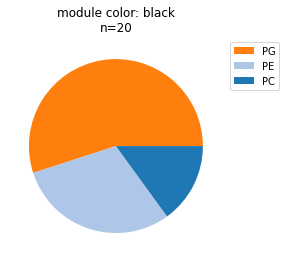

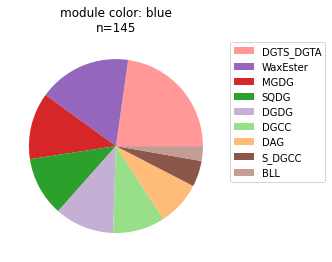

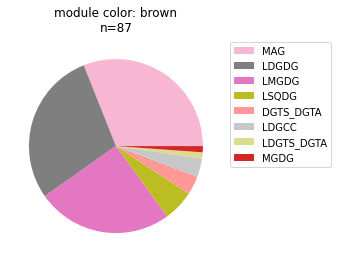

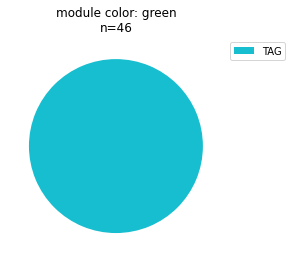

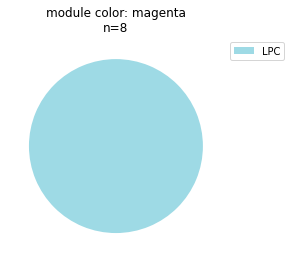

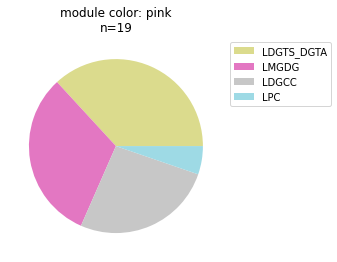

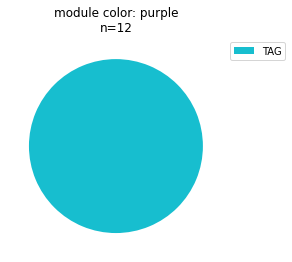

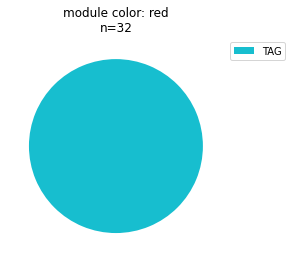

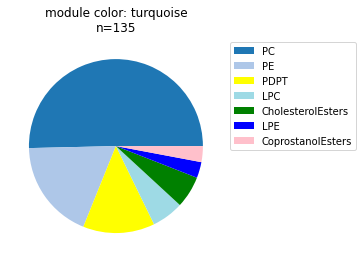

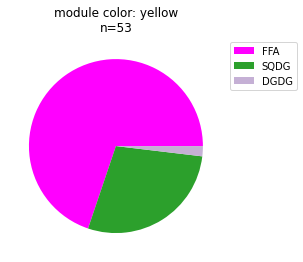

In [430]:
df_info=df_info[(df_info["moduleColor"]!="grey")&(df_info["species"]!="unknown")]

label=df_info["species"].unique()
labelcolors=list(plt.cm.tab20.colors[:len(label)])
labelcolors.extend(["blue", "green", "pink", "yellow", "magenta", "cyan"])

colours = dict(zip(label, labelcolors[:len(label)]))

for i in df_info["moduleColor"].unique():
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["moduleColor"]==i]["species"].value_counts().index)}
    fig, ax= plt.subplots(figsize=(8,4))
    plt.pie(df_info[df_info["moduleColor"]==i]["species"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["moduleColor"]==i]["species"].value_counts().index])
    plt.legend(df_info[df_info["moduleColor"]==i]["species"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title("module color: "+i+"\nn="+str(len(df_info[df_info["moduleColor"]==i])))
    path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
    name=path+"Module Color_"+i+"_piechart.png"
    #depth_df.to_csv(name)
    plt.savefig(name, bbox_inches = 'tight', dpi=150)

### What compounds make up each module? (Grid)

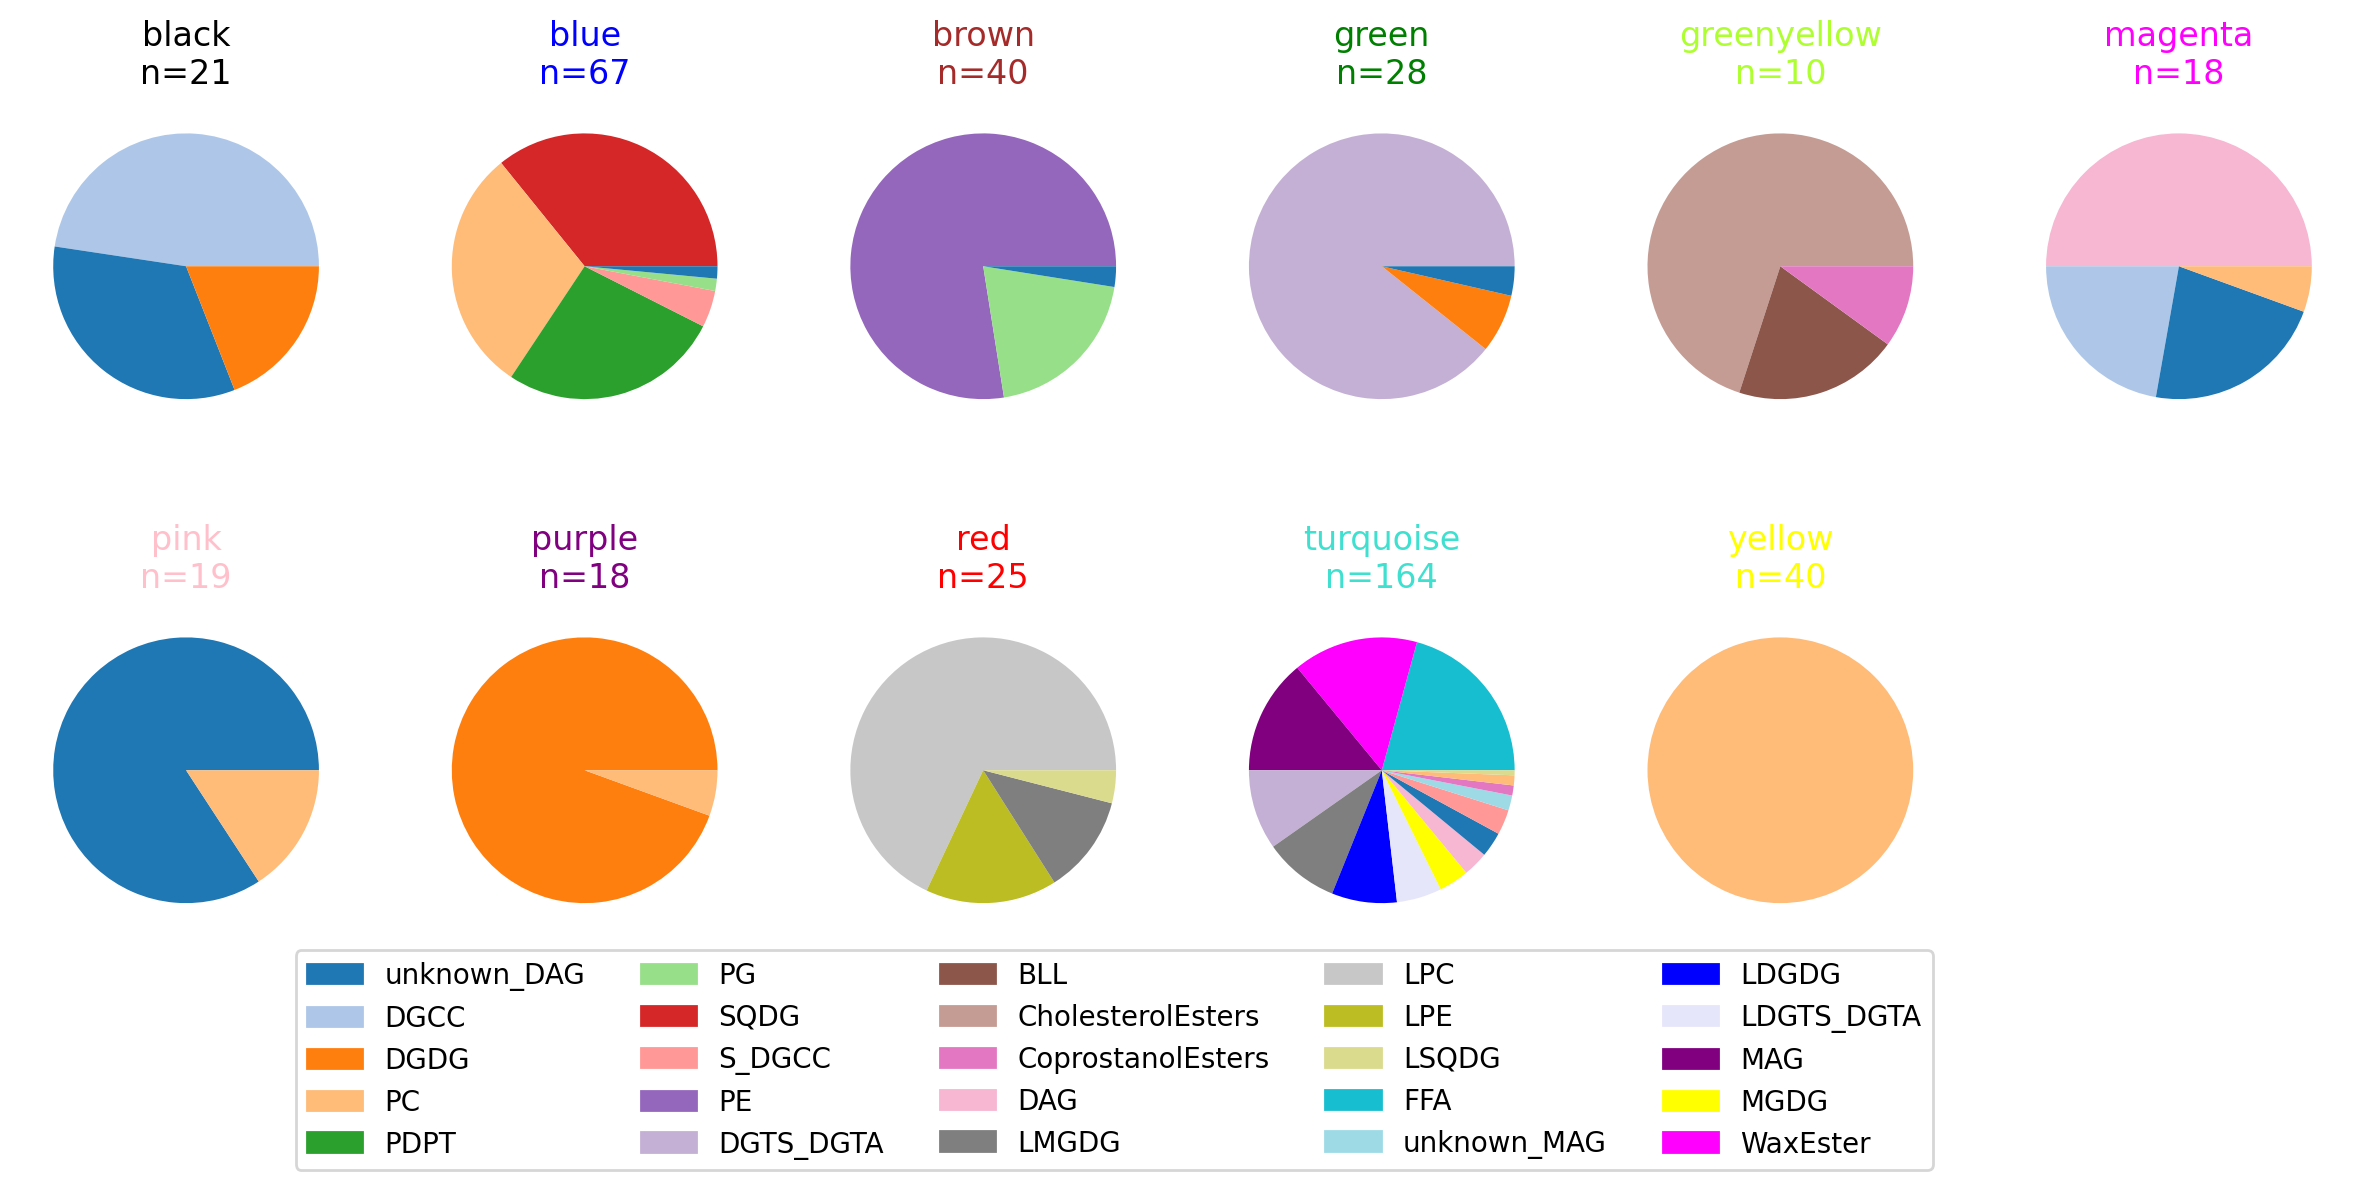

In [183]:
df_info=df_info[(df_info["moduleColor"]!="grey")&(df_info["species"]!="unknown")]

label=df_info["species"].unique()
labelcolors=list(plt.cm.tab20.colors[:len(label)])
labelcolors.extend(["blue", "lavender", "purple", "yellow", "magenta", "cyan", "greenyellow"])

colours = dict(zip(label, labelcolors[:len(label)]))

fig = plt.figure(figsize=(15,6)
                 , dpi=200
                )
color_lst={}
for n,i in enumerate(sorted(df_info["moduleColor"].unique().tolist())):
    ax1 = plt.subplot2grid((2,6),(n//6,n%6))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["moduleColor"]==i]["species"].value_counts().index)}
    plt.pie(df_info[df_info["moduleColor"]==i]["species"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["moduleColor"]==i]["species"].value_counts().index]
#            colors=dict(zip(label, label))
              )
    plt.title(i+"\nn="+str(len(df_info[df_info["moduleColor"]==i])), color=i)
    color_lst.update(colours_i)


import matplotlib.patches as mpatches
color_list=[]
for i,k in color_lst.items():
    patch=mpatches.Patch(color=k, label=i)
    color_list.append(patch)   

plt.legend(handles=color_list, ncol=5,
            bbox_to_anchor=(1,0)
          )

path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/norm to PE_noTAG/'
plt.savefig(path+"module piecharts_noDGGA_nogrey_nounknown_16_0.35.png", bbox_inches = 'tight')

### Individual module pie charts with manual color assignment

In [516]:
label=['PC', 'PE', 'PG',
       'DGTS_DGTA', 'DGCC', 'BLL', 
       'MGDG', 'SQDG','DGDG',
       'CoprostanolEsters','CholesterolEsters','WaxEster',  
       'LPC','LPE',
       'LDGCC','LDGTS_DGTA', 
       'LMGDG', 'LDGDG', 'LSQDG',
       'PDPT', 'DAG', 'unknown',
       'MAG', 'S_DGCC', "FFA","TAG"]

labelcolors=["#fef24e",matplotlib.colors.to_rgba("#fef24e", alpha=0.6), matplotlib.colors.to_rgba("#ffda00", alpha=0.8), 
             "tab:blue",matplotlib.colors.to_rgba("tab:blue", alpha=0.9),matplotlib.colors.to_rgba("tab:blue", alpha=0.8),
            "tab:green",matplotlib.colors.to_rgba("tab:green", alpha=0.9), matplotlib.colors.to_rgba("tab:green", alpha=0.8),
             "tab:red",matplotlib.colors.to_rgba("tab:red", alpha=0.9), matplotlib.colors.to_rgba("tab:red", alpha=0.8),
             matplotlib.colors.to_rgba("yellow", alpha=0.5), matplotlib.colors.to_rgba("yellow", alpha=0.3),
             matplotlib.colors.to_rgba("tab:blue", alpha=0.5),matplotlib.colors.to_rgba("tab:blue", alpha=0.4),
             matplotlib.colors.to_rgba("tab:green", alpha=0.5), matplotlib.colors.to_rgba("tab:green", alpha=0.4),matplotlib.colors.to_rgba("tab:green", alpha=0.3)
            ]
labelcolors.extend([matplotlib.colors.to_rgba("grey", alpha=0.4)]*12)

colours = dict(zip(label, labelcolors[:len(label)]))

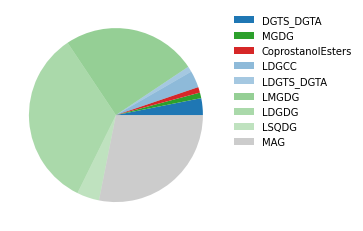

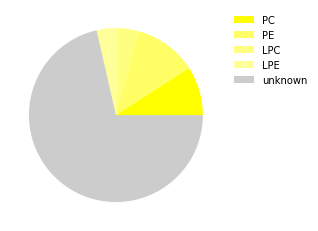

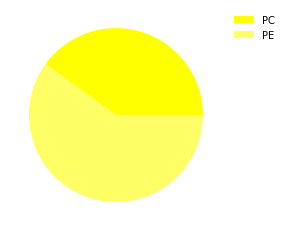

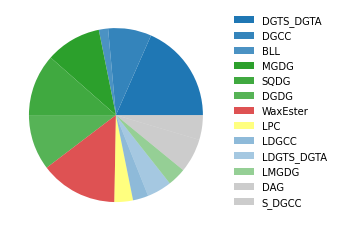

In [501]:
for i in ["blue", "brown", "black", "turquoise"]:
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["moduleColor"]==i]["species"].value_counts().index)}
    fig, ax= plt.subplots(figsize=(8,4))
    plt.pie(df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna().index])
    plt.legend(df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna().index,bbox_to_anchor=(1,1), frameon=False)
#     plt.title("module color: "+i+"\nn="+str(len(df_info[df_info["moduleColor"]==i])))
    path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
    name=path+"Module Color_"+i+"_piechart.png"
    #depth_df.to_csv(name)
#     plt.savefig(name, bbox_inches = 'tight', dpi=150)

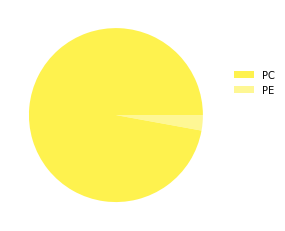

In [518]:
i="yellow"
# label_blue=['LMGDG', 'LDGDG', 'LSQDG','LDGCC','LDGTS_DGTA','PC', 'PE', 'PG',
#        'DGTS_DGTA', 'DGCC', 'BLL', 
#        'MGDG', 'SQDG','DGDG',
#        'CoprostanolEsters','CholesterolEsters','WaxEster',  "MAG" ]
colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["moduleColor"]==i]["species"].value_counts().index)}
# fig, ax= plt.subplots(figsize=(8,4))
plt.pie(df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
           colors=[colours_i[key] for key in df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna().index])

plt.legend(df_info[df_info["moduleColor"]==i]["species"].value_counts().reindex(label).dropna().index,bbox_to_anchor=(1,0.75), frameon=False)
#     plt.title("module color: "+i+"\nn="+str(len(df_info[df_info["moduleColor"]==i])))

path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl_surface/'
name=path+"Module Color_modified_"+i+"_piechart.png"
#depth_df.to_csv(name)
plt.savefig(name, bbox_inches = 'tight', dpi=500)

### Grid of pie charts for composition of species

In [11]:
df_info=df_info[(df_info["moduleColor"]!="grey")&(df_info["species"]!="unknown")]

label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18)
                 , dpi=1000
                )

for n,i in enumerate(df_info["species"].unique()):
    ax1 = plt.subplot2grid((6,4),(n//4,n%4))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
#     plt.title(i+"\nn="+str(len(df_info[df_info["species"]==i])))
#     path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/'
#     name=path+"Species_"+i+"_piechart.png"
    #depth_df.to_csv(name)
    
import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)
plt.legend(handles=color_list, ncol=5,loc='lower center', bbox_to_anchor=(-1.5,-0.5))
path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
plt.savefig(path+"species piecharts_nogrey_nounknown.png", bbox_inches = 'tight')

IndexError: GridSpec slice would result in no space allocated for subplot

In [12]:
df_info=df_info[(df_info["moduleColor"]!="grey")&(df_info["species"]!="unknown")&(df_info["species"]!="DGGA")]

label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18)
                 , dpi=800
                )

for n,i in enumerate(df_info["species"].unique()):
    ax1 = plt.subplot2grid((6,5),(n//5,n%5))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title(i+"\nn="+str(len(df_info[df_info["species"]==i])))

    
import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)
plt.legend(handles=color_list, ncol=5,loc='lower center'
           , bbox_to_anchor=(-2,-0.5)
          )
path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/'
# plt.savefig(path+"species piecharts_nogrey_nounknown_12_0.4.png", bbox_inches = 'tight')

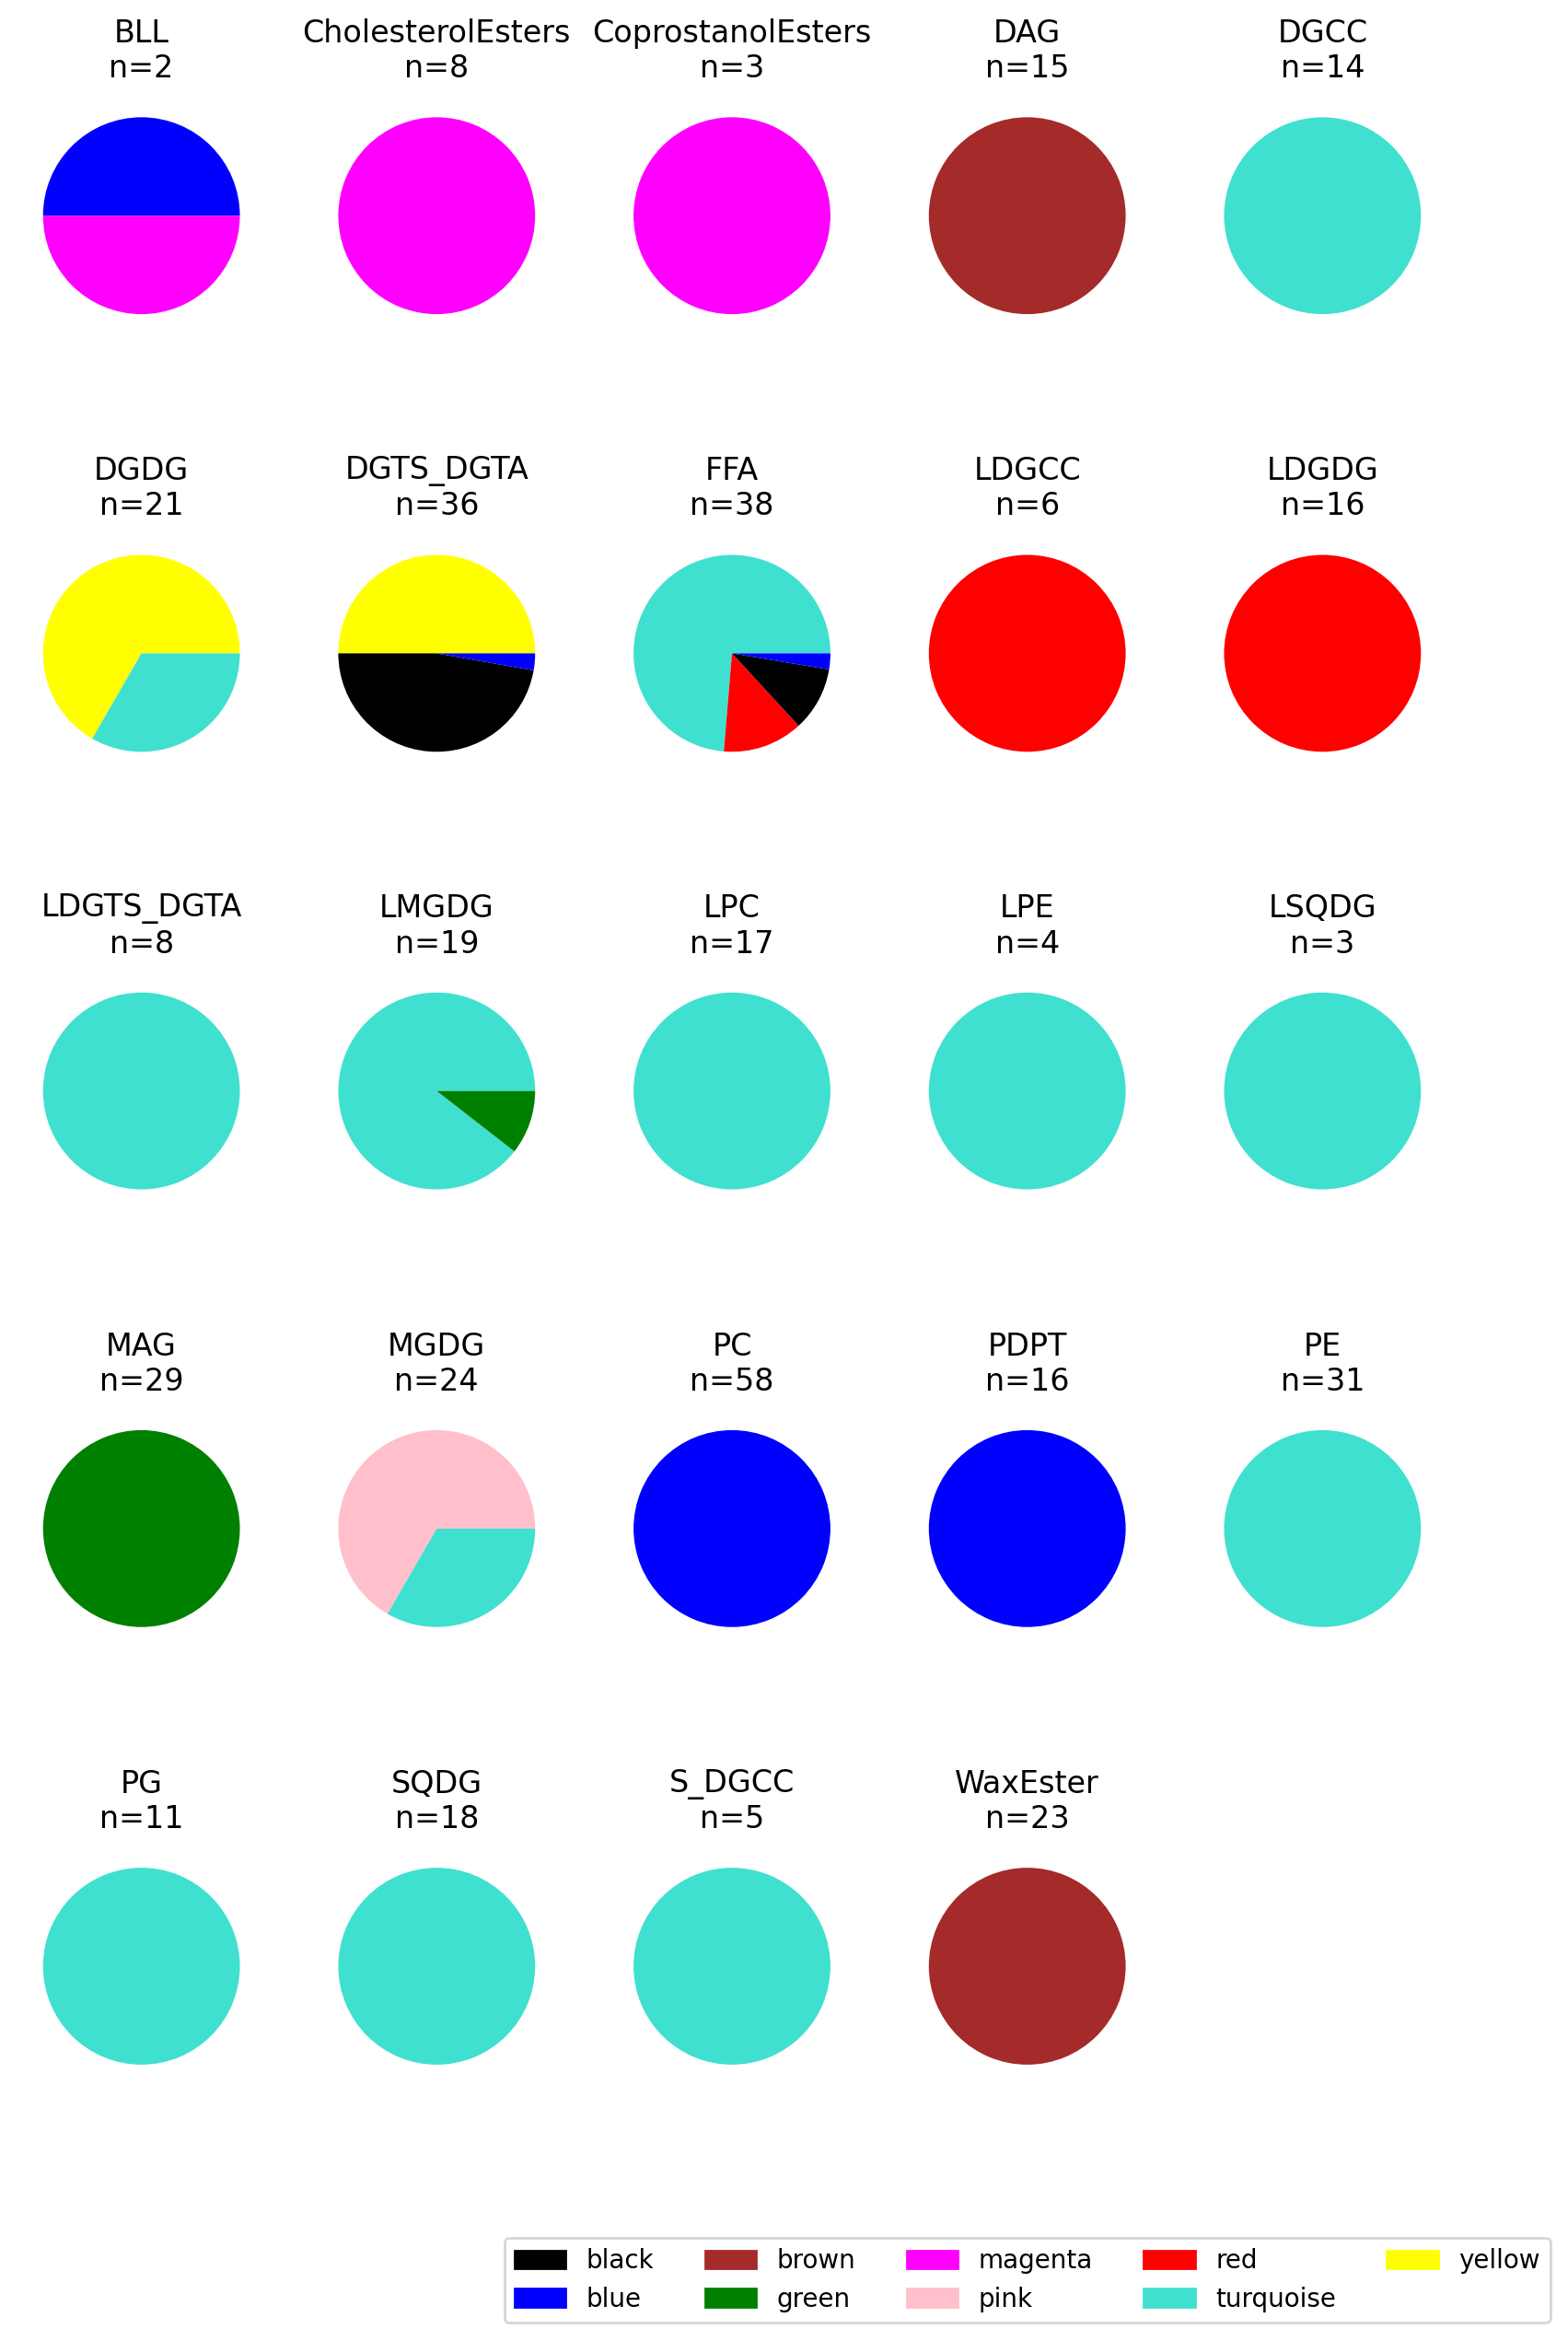

In [162]:
df_info=df_rf_info[["species","moduleColor"]]

df_info=df_info[(~df_info["species"].str.startswith("unknown"))
                &(df_info["moduleColor"]!="grey")
                &(df_info["species"]!="DGGA")
               ]

label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18)
                 , dpi=200
                )

for n,i in enumerate(sorted(df_info["species"].unique().tolist())):
    # if len(df_info["species"].unique())<25:
    #      ax1 = plt.subplot2grid((6,4),(n//4,n%4))
    # elif len(df_info["species"].unique())>25:
    ax1 = plt.subplot2grid((6,5),(n//5,n%5))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title(i+"\nn="+str(len(df_info[df_info["species"]==i])))

    
import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)   
    
# if len(df_info["species"].unique())<25:
#     plt.legend(handles=color_list, ncol=5,loc='lower center', bbox_to_anchor=(-1.5,-0.5))
# elif len(df_info["species"].unique())>25:
plt.legend(handles=color_list, ncol=5,loc='lower center'
           , bbox_to_anchor=(0.5,-1)
          )

path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/Oct 2022_ipl_div/'
plt.savefig(path+"species piecharts_noDGGA_nounknown_nogry_20_0.35.png", bbox_inches = 'tight')

In [89]:
d=[x for x in lst_species if x not in df_info_lyso["species"].unique()]
for i in d:
    lst_species.remove(i)
lst_species.append("Lyso")
lst_species

In [94]:
df_info=df_info_lyso[
#     (df_info_lyso["moduleColor"]!="grey")&
    (df_info_lyso["species"]!="DGGA")]
# &(df_info_lyso["species"]!="unknown")

label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18)
                 , dpi=800
                )

for n,i in enumerate(lst_species):
    ax1 = plt.subplot2grid((6,4),(n//4,n%4))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title(i+"\nn="+str(len(df_info[df_info["species"]==i])))

    
import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)
plt.legend(handles=color_list, ncol=5,loc='lower center'
           , bbox_to_anchor=(-1.5,-0.5)
          )
path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/'
plt.savefig(path+"species piecharts_12_0.4_ordered_lyso_unknown_grey.png", bbox_inches = 'tight')

### Individual pie charts for composition of species (loop)

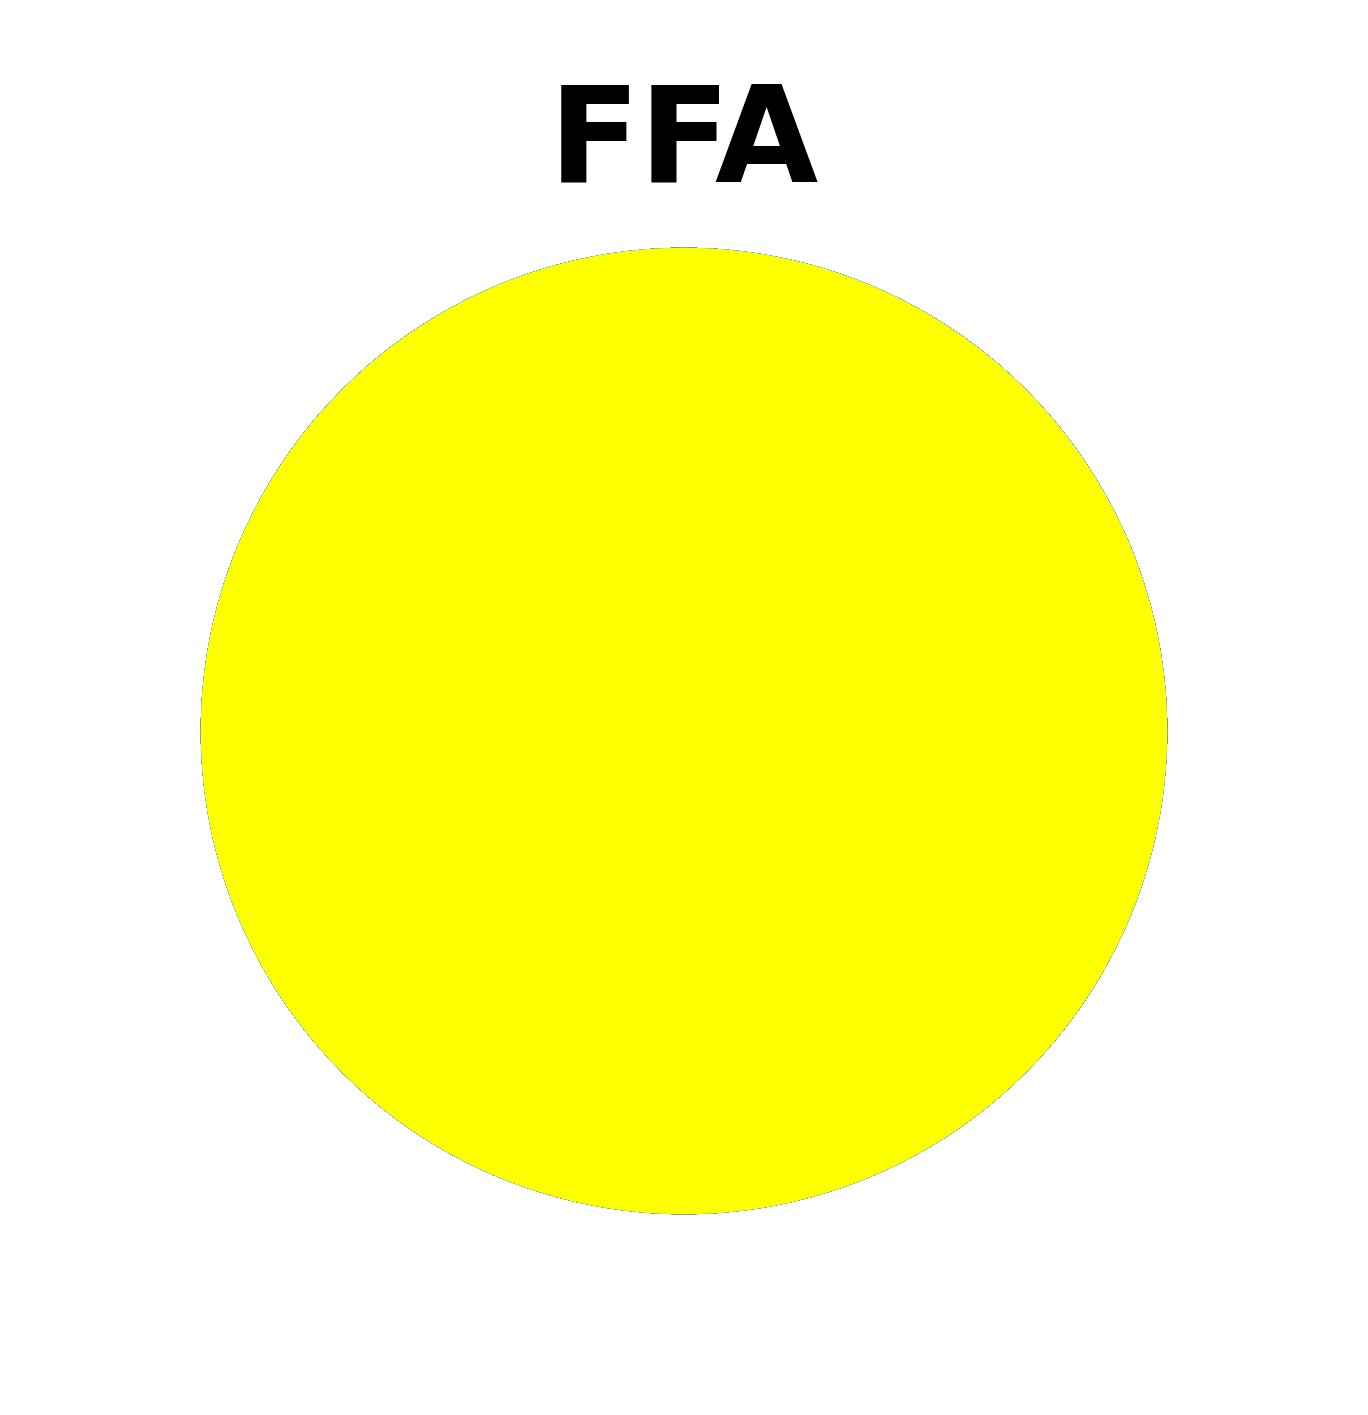

In [419]:
df_info=df_info[(df_info["moduleColor"]!="grey")&(df_info["species"]!="unknown")]

label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(2,2)
                 , dpi=800
                )

for i in df_info["species"].unique():
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title(i
              #+"\nn="+str(len(df_info[df_info["species"]==i]))
             , y=0.9, fontweight="bold")
    path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
    name=path+"Species_"+i+"_piechart.png"
    #depth_df.to_csv(name)
    plt.savefig(name, bbox_inches = 'tight')


In [30]:
path="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/old/ipl_surface/18-0.35/WGCNA result-18, mch0.35.csv"
lst=pd.read_csv(path, index_col=0,low_memory=False)
path="/Users/jiwoonhwang/Desktop/MBTS/Final datasets/final_surface_with_info.csv"
info_old=pd.read_csv(path, index_col=0,low_memory=False)
lst_con=pd.concat([lst, info_old["species"]], axis=1, join="inner")
lst_species=lst_con["species"].unique().tolist()
lst_species.extend(["TAG", "FFA"])
lst_species

['PC',
 'PE',
 'DGTS_DGTA',
 'MGDG',
 'LMGDG',
 'MAG',
 'LDGDG',
 'LDGCC',
 'LSQDG',
 'LDGTS_DGTA',
 'CoprostanolEsters',
 'LPC',
 'unknown',
 'LPE',
 'PDPT',
 'SQDG',
 'WaxEster',
 'DGDG',
 'BLL',
 'S_DGCC',
 'DAG',
 'CholesterolEsters',
 'PG',
 'DGCC',
 'TAG',
 'FFA']

In [88]:
path="/Users/jiwoonhwang/Desktop/MBTS/WGCNA/old/ipl+tag/WGCNA result-20, mch0.35.csv"
lst=pd.read_csv(path, index_col=0,low_memory=False)
path="/Users/jiwoonhwang/Desktop/MBTS/Final datasets/final_surface_with_info.csv"
info_old=pd.read_csv(path, index_col=0,low_memory=False)
lst_con=pd.concat([lst, info_old["species"]], axis=1, join="inner")
lst_species=lst_con["species"].unique().tolist()
# lst_species.extend(["TAG", "FFA"])
lst_species

['PC',
 'PE',
 'PG',
 'DAG',
 'SQDG',
 'DGCC',
 'MGDG',
 'DGTS_DGTA',
 'WaxEster',
 'DGDG',
 'S_DGCC',
 'BLL',
 'LMGDG',
 'MAG',
 'LDGDG',
 'LDGCC',
 'LSQDG',
 'LDGTS_DGTA',
 'TAG',
 'unknown',
 'LPE',
 'CoprostanolEsters',
 'CholesterolEsters',
 'PDPT',
 'FFA',
 'LPC']

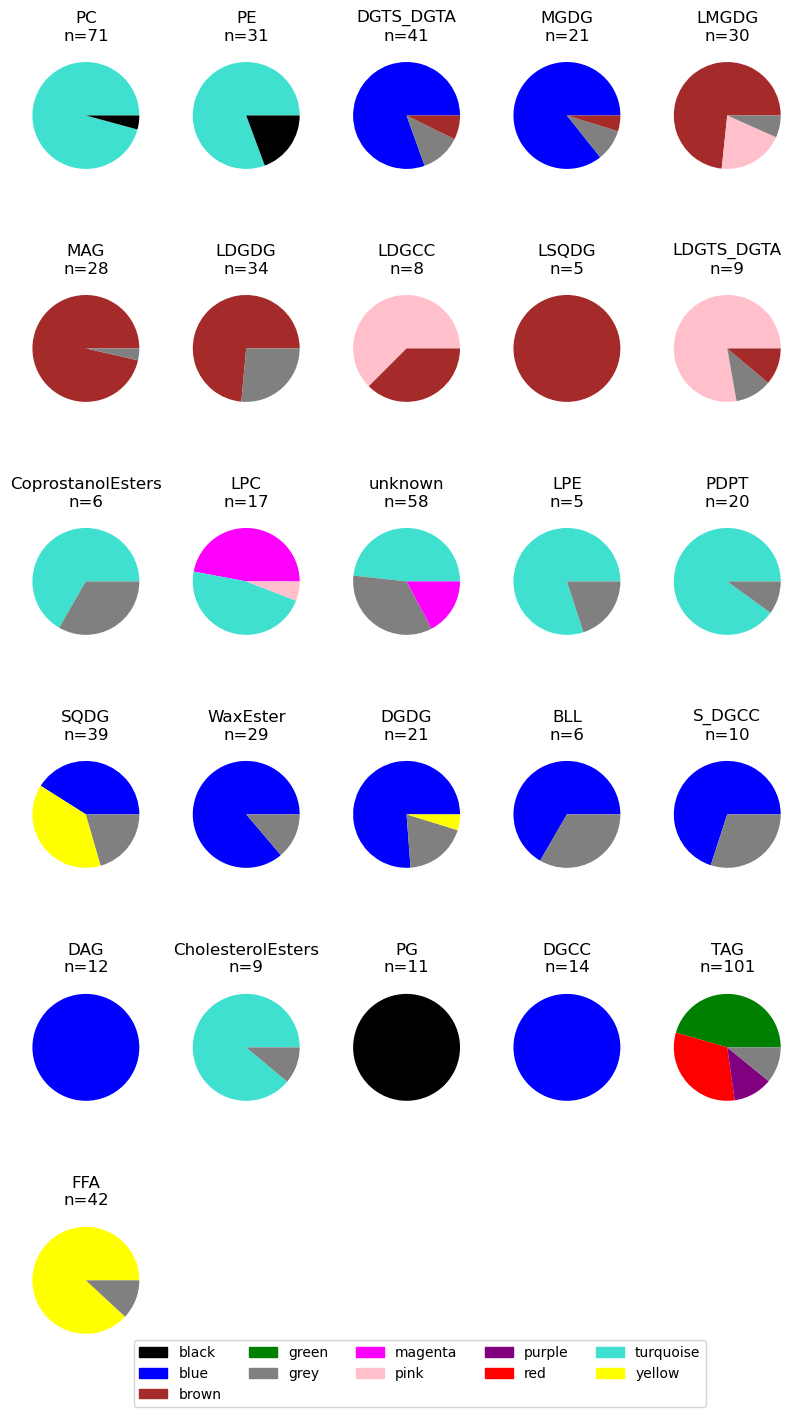

In [56]:
label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18)
                 , dpi=100
                )

for n,i in enumerate(lst_species):
    ax1 = plt.subplot2grid((6,5),(n//5,n%5))
    colours_i = {k: v for k, v in colours.items() if k in (df_info[df_info["species"]==i]["moduleColor"].value_counts().index)}
    plt.pie(df_info[df_info["species"]==i]["moduleColor"].value_counts(), 
#             labels=df_info[df_info["moduleColor"]==i]["species"].value_counts().index,
               colors=[colours_i[key] for key in df_info[df_info["species"]==i]["moduleColor"].value_counts().index]
#            colors=dict(zip(label, label))
              )
#     plt.legend(df_info[df_info["species"]==i]["moduleColor"].value_counts().index,bbox_to_anchor=(1,1))
    plt.title(i+"\nn="+str(len(df_info[df_info["species"]==i])))
    path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/'
    name=path+"Speciimport matplotlib.patches as mpatcheses_"+i+"_piechart.png"
    #depth_df.to_csv(name)
    
import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)
plt.legend(handles=color_list, ncol=5,loc='lower center', bbox_to_anchor=(3,-0.5))
path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
plt.savefig(path+"species piecharts.png", bbox_inches = 'tight')

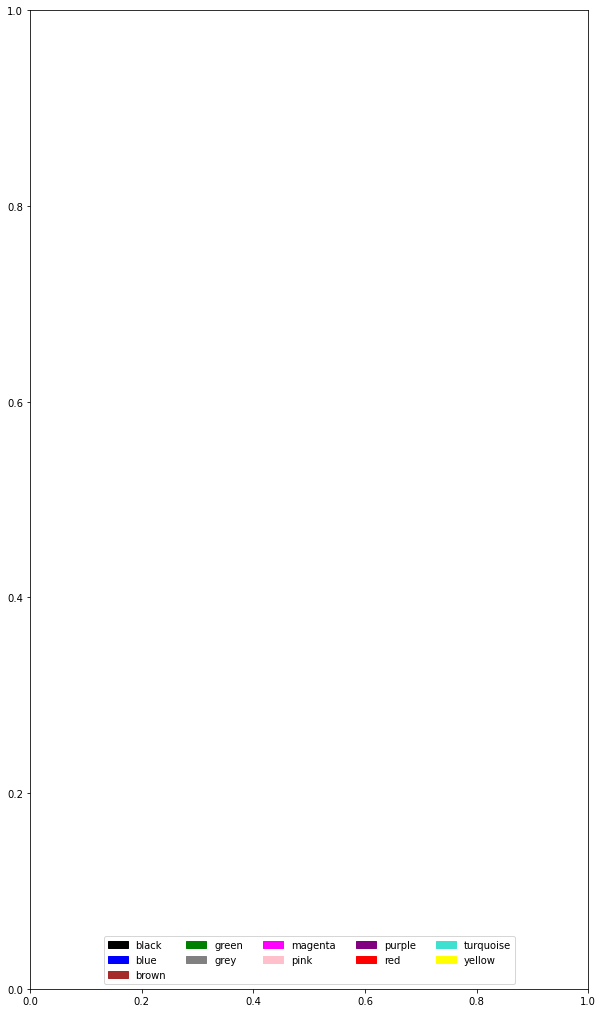

In [43]:
label=df_info["moduleColor"].unique()
colours = dict(zip(label, label))
fig = plt.figure(figsize=(10,18))

import matplotlib.patches as mpatches
color_list=[]
for i in df_info["moduleColor"].unique():
    i=mpatches.Patch(color=i, label=i)
    color_list.append(i)
plt.legend(handles=color_list, ncol=5,loc='lower center')
#     plt.savefig(name, bbox_inches = 'tight', dpi=150)

## LINE PLOTS

In [141]:
template=df_con.reset_index()
df_lineplot=template.rename(columns={"index":"compound_name"})


In [130]:
var_exp=pd.read_csv("/Users/jiwoonhwang/Desktop/MBTS/WGCNA/WGCNA var explained.csv", low_memory=False)
var_exp=var_exp.rename(index={0:"varience_explained"})
for i in var_exp.columns:
    i_new=i[2:]
    var_exp=var_exp.rename(columns={i:i_new})
var_exp

black      blue     brown     green  greenyellow  \
varience_explained  0.733487  0.591031  0.764929  0.670538     0.868771   

                        grey   magenta     pink    purple       red  \
varience_explained  0.283597  0.728734  0.80288  0.789356  0.719966   

                    turquoise    yellow  
varience_explained    0.47939  0.717464

In [131]:
df_lineplot

compound_name moduleColor  MARS_C03_000m_1  \
0             PG 28:0|PG 14:0_14:0       black         1.994598   
1    PG 34:3|PG 16:0_18:3_RT:11.64       black        -1.034833   
2             PG 34:4|PG 16:0_18:4       black         2.737243   
3             PG 36:2|PG 18:1_18:1       black         3.300969   
4                          PG 36:5       black         5.425628   
..                             ...         ...              ...   
721                      TAG 58:13      yellow         0.890629   
722                  TAG 58:13 +2O      yellow        -2.978786   
723                      TAG 58:14      yellow         0.450057   
724                      TAG 58:15      yellow         0.450057   
725          TAG 60:13_RT:21.10249      yellow        -0.846336   

     MARS_C03_000m_2  MARS_C03_000m_3  MARS_C10_000m_1  MARS_C10_000m_2  \
0           4.697730        -4.520410         1.761020         0.929900   
1           3.539916        -3.326526         1.031585         0.445135   
2           5.105276        -0.067517         2.011120         1.006141   
3           5.621222         0.446217         2.830367         1.860683   
4           7.919134         2.583985         4.217726         3.163539   
..               ...              ...              ...              ...   
721         3.496084        -2.549895         2.522212         4.427571   
722         0.408621        -6.386396        -0.577323        -0.671965   
723         3.215976        -2.964932         4.329567         4.334461   
724         3.932183        -2.784360         4.107175         4.012533   
725         4.266602        -3.984297        -6.227623         1.963623   

     MARS_C10_000m_3  MARS_C12_000m_1  MARS_C12_000m_2  ...  MARS_C25_000m_3  \
0           0.698608        -3.844575        -3.950573  ...        -2.163148   
1           0.274223        -7.955680        -9.212297  ...        -1.633510   
2           0.733726        -2.643140        -5.393171  ...         0.301084   
3           1.627561        -1.786235        -4.369925  ...         0.599825   
4           3.003693        -2.423514        -4.210867  ...         0.358371   
..               ...              ...              ...  ...              ...   
721         0.223990         1.829622         9.742423  ...         5.191709   
722        -2.875546        -1.269914         6.806149  ...         2.482758   
723         2.031345         0.829622         8.595582  ...         3.139870   
724         1.808952         1.467052         9.543114  ...         5.274171   
725         2.446382         2.613893        10.730741  ...        -0.016048   

     MARS_C29_000m_1  MARS_C29_000m_2  MARS_C29_000m_3  MARS_C34_000m_1  \
0          -0.104175        -2.723852        -2.845317        -1.216563   
1           0.097022         2.430238        -2.584046        -1.172871   
2           1.365478         3.272679        -2.026651        -0.216833   
3           2.700211         5.095318        -0.229713         1.295991   
4           2.203017         4.603758        -0.630046         0.688461   
..               ...              ...              ...              ...   
721         1.891551         2.334911        -0.662995         3.299157   
722        -1.193338        -0.712395        -3.530358        -1.117928   
723         0.891551         0.840146        -1.025565         3.102121   
724         2.991086         0.628642         1.151973         3.525928   
725        -4.020502         4.024570        -2.250658        -1.489897   

     MARS_C34_000m_2  MARS_C34_000m_3  MARS_C38_000m_1  MARS_C38_000m_2  \
0          -4.053042        -6.969556        -3.965324        -5.305113   
1          -3.996926        -6.807628        -2.586738        -5.358973   
2          -2.987161        -5.880625        -1.993979        -4.803766   
3          -1.560867        -4.460232        -0.502289        -3.437159   
4          -2.205064        -5.018058        -0.368295        -3.116028   
.. 

In [142]:
df1=df_lineplot.melt(id_vars=['compound_name','moduleColor'], var_name="Cast")

In [143]:
df1["Cast"]=df1.Cast.str.split("_", expand=True)[1]

In [144]:
df1 ###name of first column must be "compound_name"

compound_name moduleColor Cast     value
0                   SQDG 18:4_18:4       black  C03 -3.036587
1                        SQDG 28:0       black  C03 -1.215400
2                        SQDG 30:0       black  C03 -1.809637
3                        SQDG 30:1       black  C03 -4.787281
4                        SQDG 30:2       black  C03 -3.733529
...                            ...         ...  ...       ...
16855                    DGDG 26:6      yellow  C38 -4.777231
16856  DGDG 28:0 +3O,SQDG 38:5 +1O      yellow  C38 -4.710170
16857                DGDG 28:1 +3O      yellow  C38  2.336908
16858      DGDG 28:4 +2O,SQDG 38:9      yellow  C38 -3.207071
16859     DGDG 30:5 +2O,SQDG 40:10      yellow  C38 -4.558478

[16860 rows x 4 columns]

### Individual line plots for each module (loop)

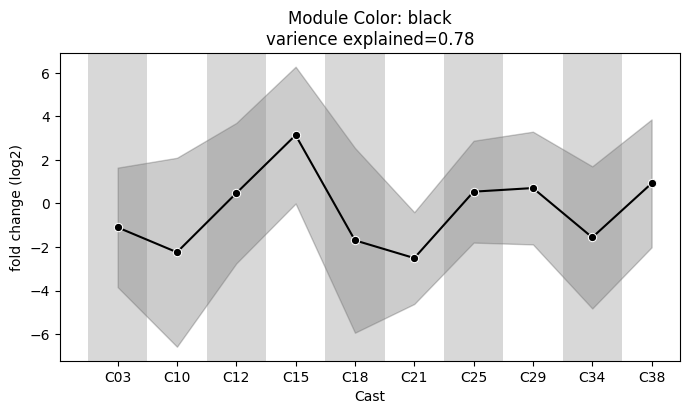

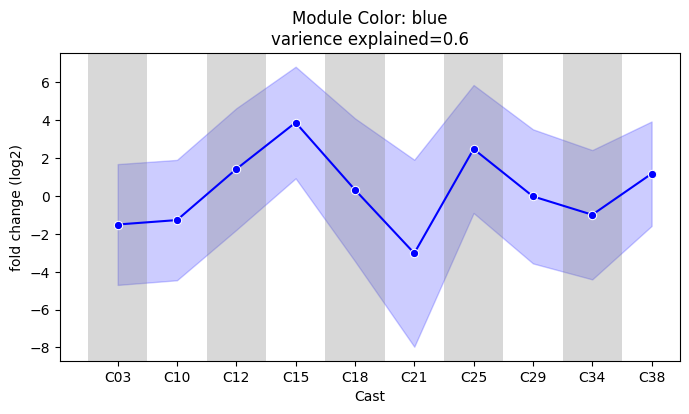

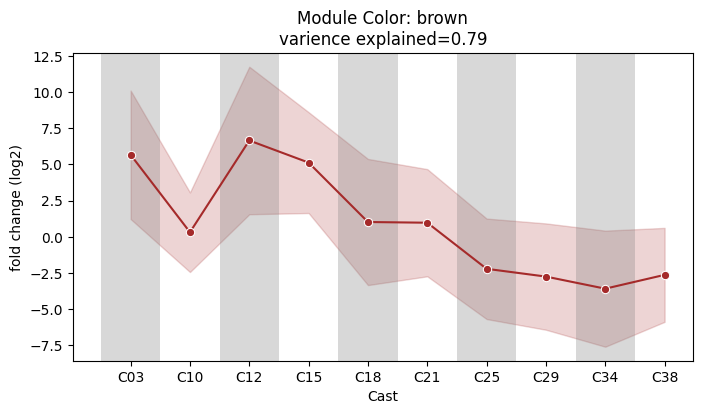

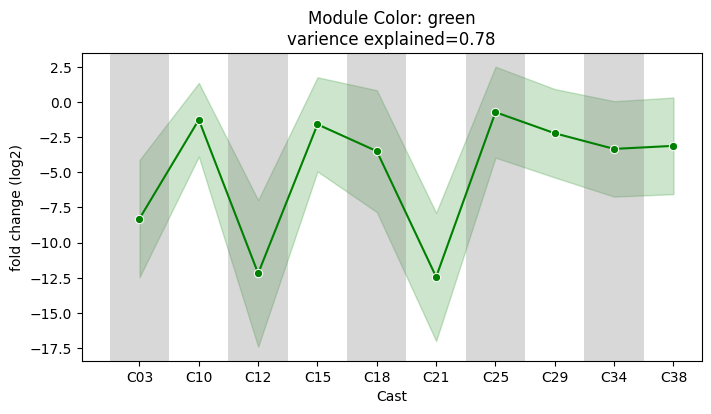

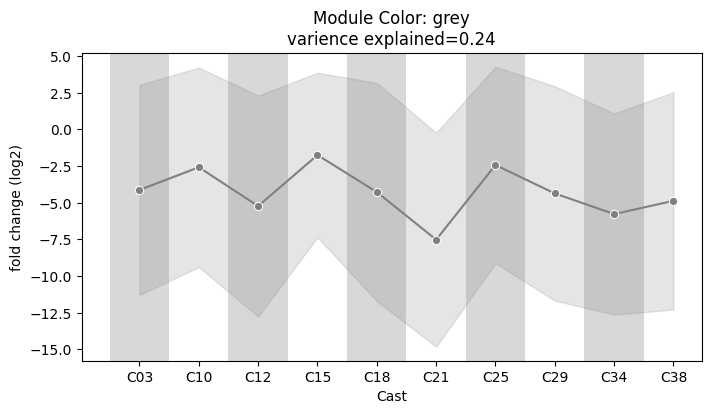

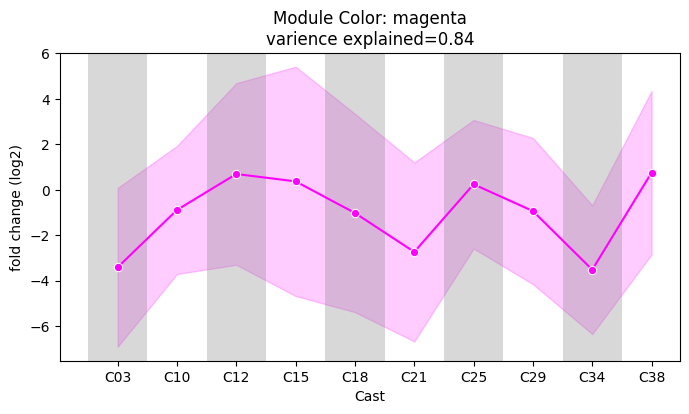

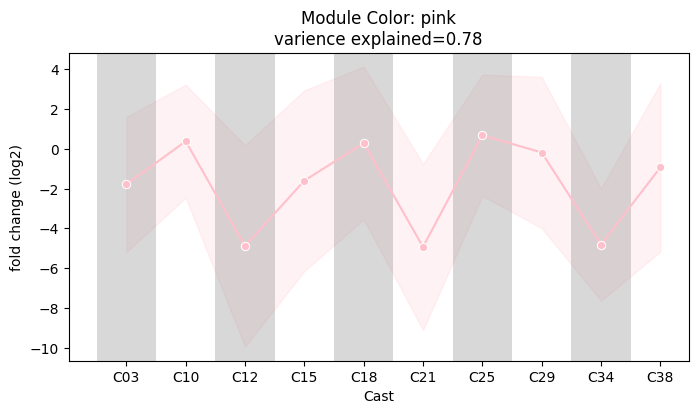

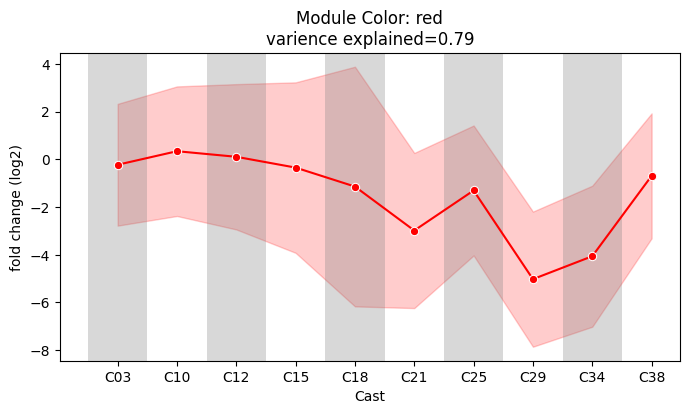

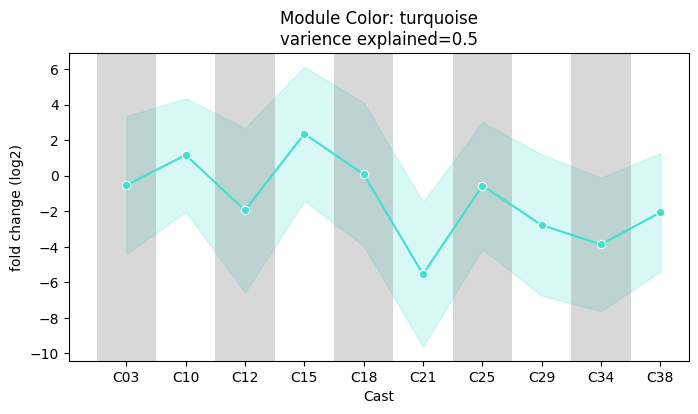

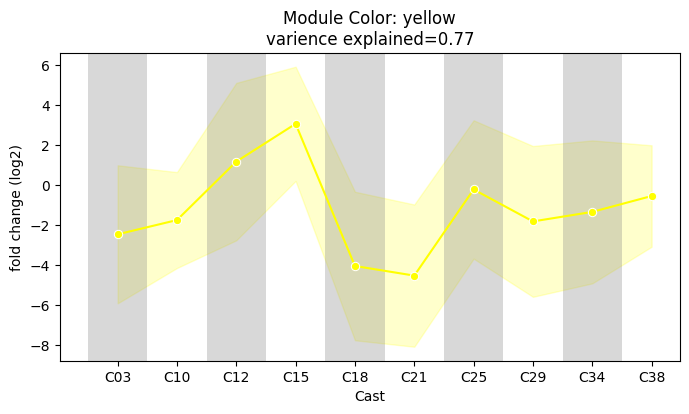

In [117]:
 for i in df1["moduleColor"].unique():
    fig, ax= plt.subplots(figsize=(8,4))
    # df2=df1.copy()
    # df2["value"]=df1["value"].apply(np.log2)
    data=df1[df1["moduleColor"]==i]
    #     df1["compound_name"].isin(flip)
    #          |df1["compound_name"].str.startswith(tuple(flip))

    sns.lineplot(data=data,x="Cast", y="value", errorbar='sd', color=i
    #                  hue="compound_name"
                 , marker='o'
    #                     ,palette="flare" 
                )
    # plt.title("Astaxanthin", fontsize=14)
    plt.ylabel("fold change (log2)")

    ## blocks for day-night distinction
    ax.axvspan(-0.5,0.5, alpha=0.3, facecolor='grey')
    ax.axvspan(1.5,2.5, alpha=0.3, facecolor='grey')
    ax.axvspan(3.5,4.5, alpha=0.3, facecolor='grey')
    ax.axvspan(5.5,6.5, alpha=0.3, facecolor='grey')
    ax.axvspan(7.5,8.5, alpha=0.3, facecolor='grey')


#     h,l = ax.get_legend_handles_labels()
#     l1=ax.legend(bbox_to_anchor=(1,1))

    plt.title("Module Color: "+i+"\nvarience explained="+str(round(var_exp.loc["varience_explained",i],2)))

    path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/'
    name=path+"Module Color_"+i+"_lineplot.png"
    #depth_df.to_csv(name)
    plt.savefig(name, bbox_inches = 'tight', dpi=150)



### Individual line plots for specific modules

<ipython-input-490-3ea608eaf5b9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(data["Cast"].unique(), rotation=0, weight='bold', size=12)
<ipython-input-490-3ea608eaf5b9>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_yticklabels(ax[n].get_yticks(), rotation=0, weight='bold', size=12)
<ipython-input-490-3ea608eaf5b9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(data["Cast"].unique(), rotation=0, weight='bold', size=12)
<ipython-input-490-3ea608eaf5b9>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_yticklabels(ax[n].get_yticks(), rotation=0, weight='bold', size=12)
<ipython-input-490-3ea608eaf5b9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(data["Cast"].unique(), rotation=0, weight='bold', size=12)
<ipython-input-490-3ea608eaf5b9

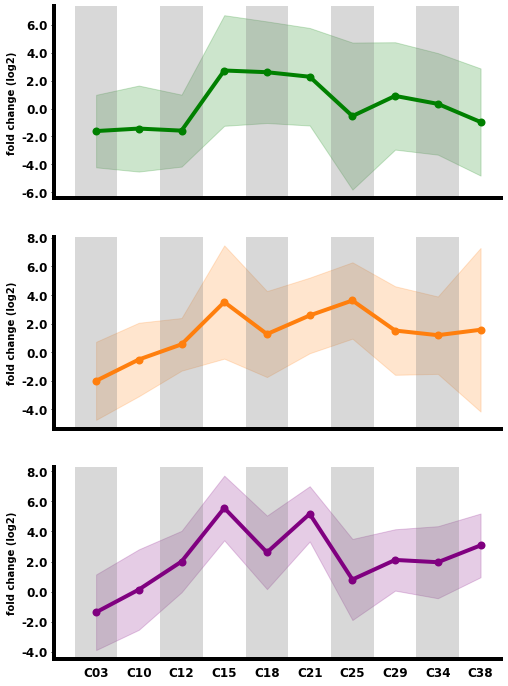

In [490]:
modules=["green", "red", "purple"]
colors=["green", "tab:orange", "purple"]
# modules=["blue",  "turquoise"]
# colors=["blue",  "#00b9bc"]

# modules=["yellow", "red"]
# colors=["#ffda00","red"]
fig, ax= plt.subplots(len(modules),1,figsize=(8,4*len(modules)), sharex=True, 
#                       sharey=True
                     ) 
for n,i in enumerate(modules):
    
    # df2=df1.copy()
    # df2["value"]=df1["value"].apply(np.log2)
    data=df1[df1["moduleColor"]==i]
    #     df1["compound_name"].isin(flip)
    #          |df1["compound_name"].str.startswith(tuple(flip))

    sns.lineplot(ax=ax[n],data=data,x="Cast", y="value", ci='sd', color=colors[n]
    #                  hue="compound_name"
                 , marker='o'
                 , markersize=8
                 , markeredgecolor="none"
    #                     ,palette="flare" 
                ,linewidth=4)
    # plt.title("Astaxanthin", fontsize=14)
#     ax[n].set_ylim([-15,10])
    
    ax[n].set_ylabel("fold change (log2)", weight="bold")
    ax[n].set_xlabel('')


## blocks for day-night distinction
    ax[n].axvspan(-0.5,0.5, alpha=0.3, facecolor='grey')
    ax[n].axvspan(1.5,2.5, alpha=0.3, facecolor='grey')
    ax[n].axvspan(3.5,4.5, alpha=0.3, facecolor='grey')
    ax[n].axvspan(5.5,6.5, alpha=0.3, facecolor='grey')
    ax[n].axvspan(7.5,8.5, alpha=0.3, facecolor='grey')
    
    ax[n].spines['right'].set_visible(False)
#     ax[n].spines['left'].set_visible(False)
    ax[n].spines['top'].set_visible(False)
#     ax[n].spines['bottom'].set_visible(False)
#     ax[n].get_xaxis().set_visible(False)
    ax[n].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False      # ticks along the bottom edge are off
)
    ax[n].spines['bottom'].set_linewidth(4)
    ax[n].spines['left'].set_linewidth(4)

    ax[n].set_xticklabels(data["Cast"].unique(), rotation=0, weight='bold', size=12)
    ax[n].set_yticklabels(ax[n].get_yticks(), rotation=0, weight='bold', size=12)

#     h,l = ax.get_legend_handles_labels()
#     l1=ax.legend(bbox_to_anchor=(1,1))

#     plt.title("Module Color: "+i)

path='/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/'
name=path+"tag_lineplot.png"
    #depth_df.to_csv(name)
plt.savefig(name, bbox_inches = 'tight', dpi=500)



### facet grid for all line plots

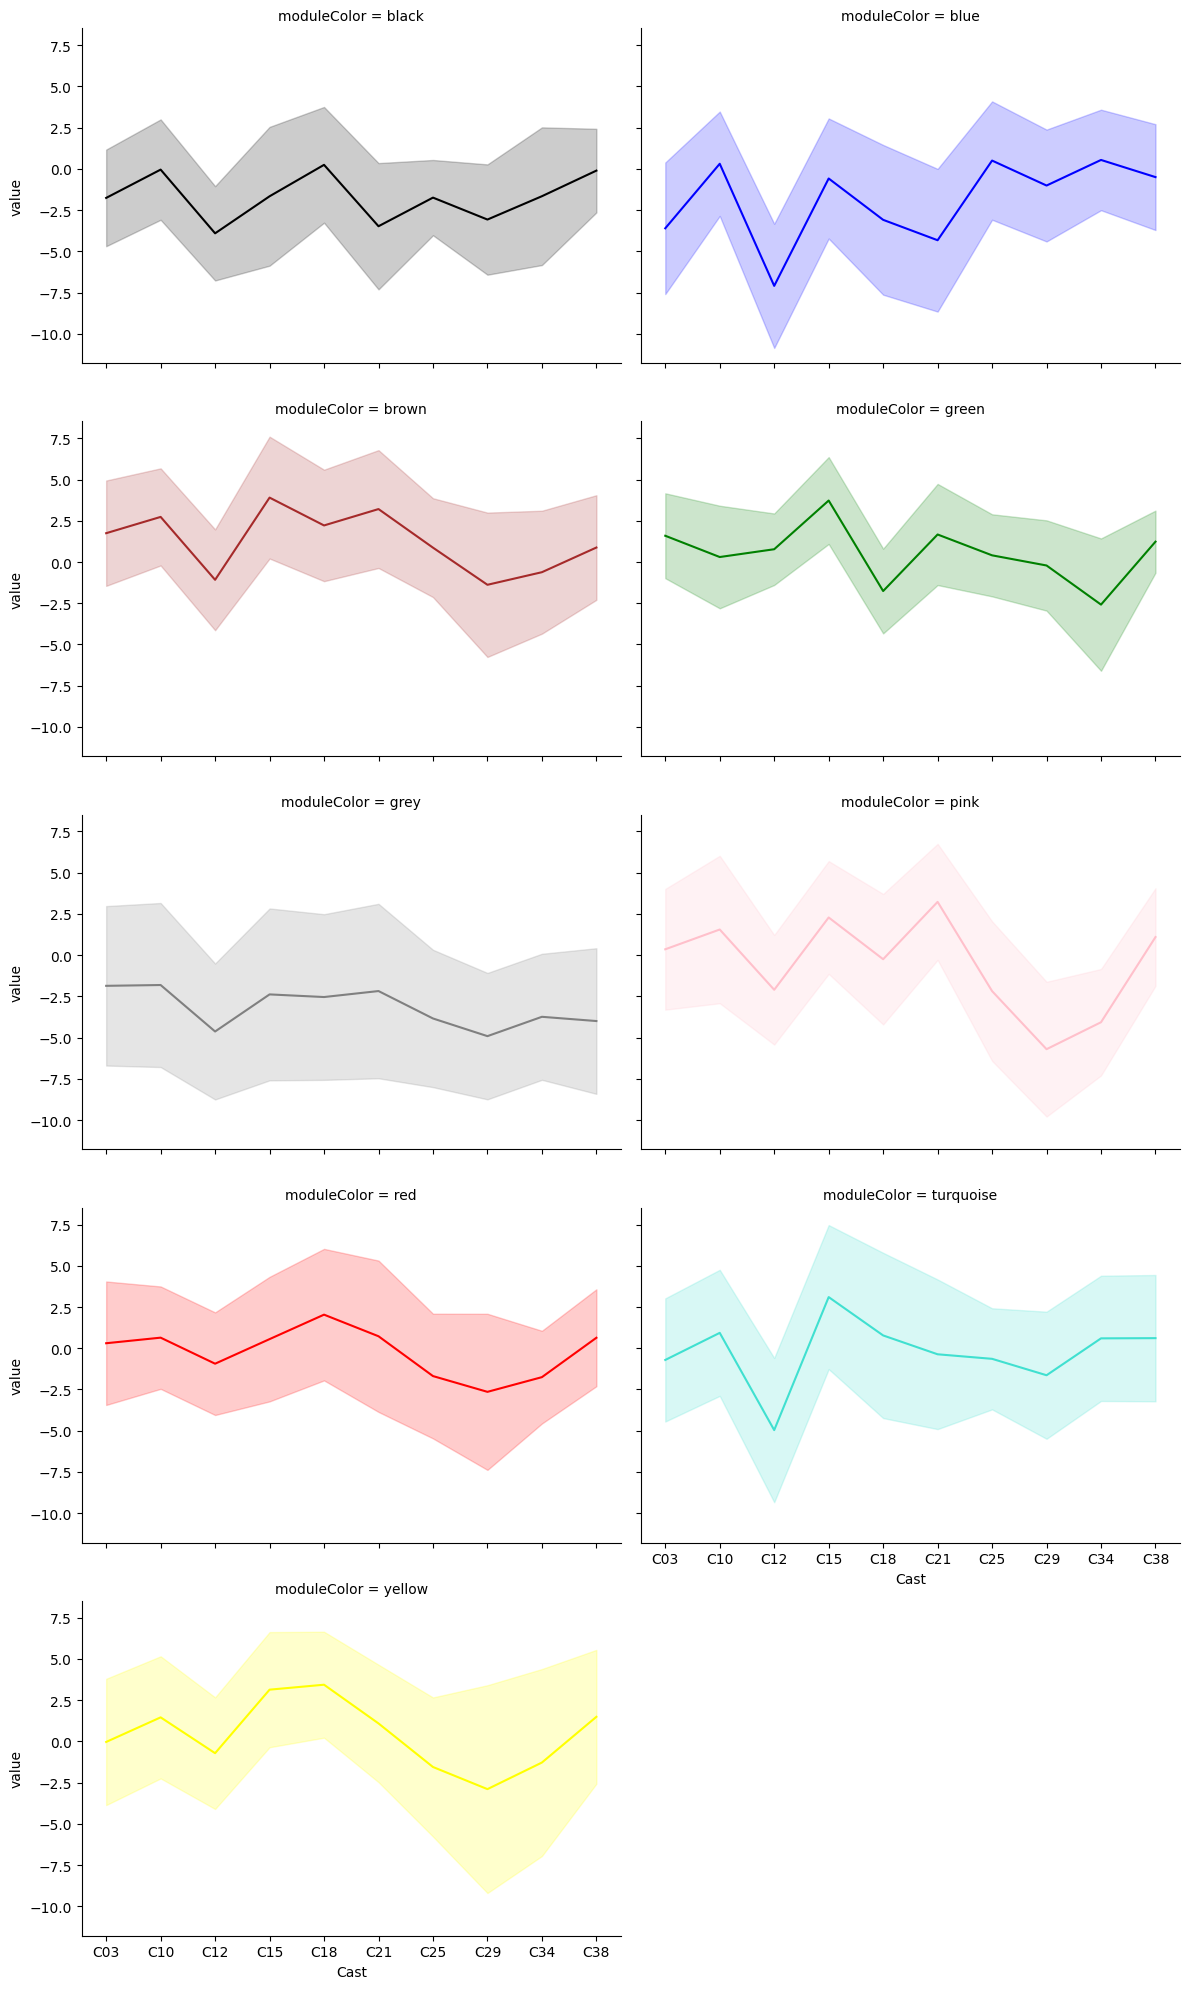

In [145]:
palette=df1.moduleColor.unique()
# ['black', 'blue', 'brown', 'cyan', 'green', 'greenyellow', 'grey',
#        "#C0C0C0", 'lightcyan', 'lightgreen', 'lightyellow', 'magenta',
#        'midnightblue', 'pink', 'purple', 'red', 'salmon', 'tan',
#        'turquoise', 'yellow']
g = sns.FacetGrid(df1, col="moduleColor", col_wrap=2, hue="moduleColor", palette=palette, height=4, aspect=1.5, legend_out=True)
g.map_dataframe(sns.lineplot, x="Cast", y="value", errorbar='sd')

plt.savefig("facetgrid.png", bbox_inches = 'tight', dpi=500)

## HISTOGRAMS

array([[<AxesSubplot:title={'center':'green'}>,
        <AxesSubplot:title={'center':'grey'}>],
       [<AxesSubplot:title={'center':'purple'}>,
        <AxesSubplot:title={'center':'red'}>]], dtype=object)

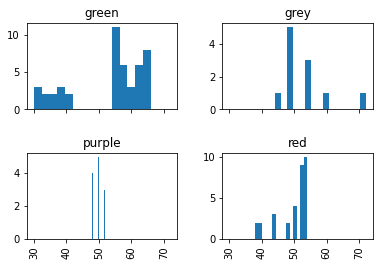

In [73]:
TAG=df_rf_info[df_rf_info["species"]=="TAG"]
# PC[["FA_total_no_C", "moduleColor"]]
TAG.FA_total_no_C.hist(by=df.moduleColor, sharex=True, bins=15)

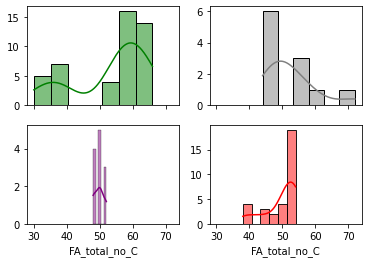

In [341]:
fig, ax=plt.subplots(2,2,sharex=True)        
# fig.suptitle("ETH-Depth for Mariana Forearc", fontsize=18) 
# # plt.figure(figsize=(4,10))
colors=["green", "grey", "purple", "red"]
sns.set_palette(sns.color_palette(colors))

for n,i in enumerate(TAG["moduleColor"].unique()):
    sns.histplot(ax=ax[n//2,n%2],data=TAG[TAG["moduleColor"]==i], x="FA_total_no_C", color=i,kde=True)
    ax[n//2,n%2].set_ylabel('')

<ipython-input-496-1831a941c677>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels([0,30,40,50,60], rotation=0, weight='bold', size=10)
<ipython-input-496-1831a941c677>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_yticklabels(ax[n].get_yticks().astype("int"), rotation=0, weight='bold', size=10)


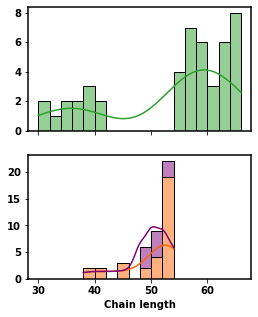

In [496]:
fig, ax=plt.subplots(2,1,sharex=True, figsize=(4,5))        

sns.histplot(ax=ax[0],data=TAG[TAG["moduleColor"]=="green"], x="FA_total_no_C", color="tab:green",kde=True, bins=18)
ax[0].set_ylabel('')

colors=["purple", "#ff6600"]
sns.set_palette(sns.color_palette(colors))
sns.histplot(ax=ax[1],data=TAG[TAG["moduleColor"].isin(["purple", "red"])], x="FA_total_no_C", hue="moduleColor",multiple="stack",
             #color="tab:purple",
             kde=True, legend=False)
ax[1].set_ylabel('')

ax[1].set_xlabel('Chain length', weight="bold")

for n in [0,1]:
    ax[n].set_xticklabels([0,30,40,50,60], rotation=0, weight='bold', size=10)
    ax[n].set_yticklabels(ax[n].get_yticks().astype("int"), rotation=0, weight='bold', size=10)
#     ax[n].tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False      # ticks along the bottom edge are off
#     )

for i in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[i].set_linewidth(1.5)
    ax[1].spines[i].set_linewidth(1.5)

# plt.savefig('/Users/jiwoonhwang/Desktop/MBTS/WGCNA/ipl+tag/tag_hist.png', dpi=200)

<AxesSubplot:xlabel='FA_total_no_C', ylabel='Count'>

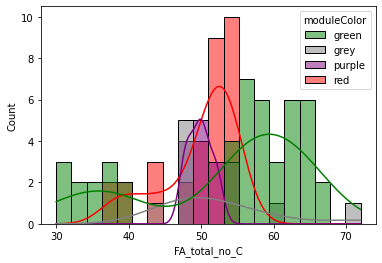

In [94]:
sns.histplot(TAG, x="FA_total_no_C", hue="moduleColor", bins=20, kde=True)

<AxesSubplot:xlabel='FA_total_no_DB', ylabel='Count'>

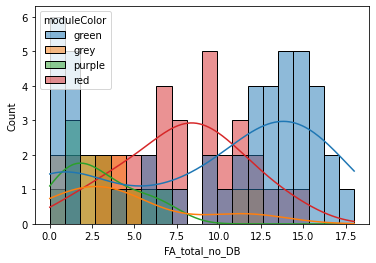

In [75]:
sns.histplot(TAG, x="FA_total_no_DB", hue="moduleColor", bins=20, kde=True)

array([[<AxesSubplot:title={'center':'black'}>,
        <AxesSubplot:title={'center':'brown'}>],
       [<AxesSubplot:title={'center':'green'}>,
        <AxesSubplot:title={'center':'magenta'}>],
       [<AxesSubplot:title={'center':'red'}>,
        <AxesSubplot:title={'center':'yellow'}>]], dtype=object)

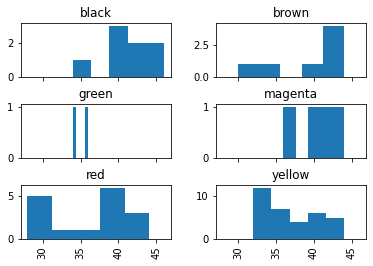

In [44]:
PC=df_rf_info[df_rf_info["species"]=="PC"]
# PC[["FA_total_no_C", "moduleColor"]]
PC.FA_total_no_C.hist(by=df.moduleColor, sharex=True, bins=5)

array([[<AxesSubplot:title={'center':'black'}>,
        <AxesSubplot:title={'center':'brown'}>],
       [<AxesSubplot:title={'center':'magenta'}>,
        <AxesSubplot:title={'center':'pink'}>],
       [<AxesSubplot:title={'center':'red'}>,
        <AxesSubplot:title={'center':'yellow'}>]], dtype=object)

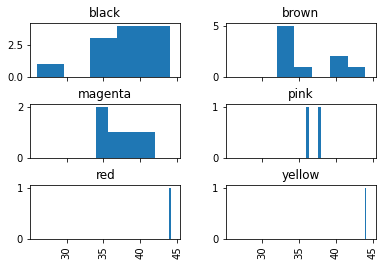

In [43]:
PE=df_rf_info[df_rf_info["species"]=="PE"]
# PC[["FA_total_no_C", "moduleColor"]]
PE.FA_total_no_C.hist(by=df.moduleColor, sharex=True, bins=5)

In [483]:
df_info["moduleColor"].value_counts()

blue         145
turquoise    135
brown         87
yellow        53
green         46
red           32
black         20
pink          19
purple        12
magenta        8
Name: moduleColor, dtype: int64

In [13]:
TAG=df_rf_info[df_rf_info["species"]=="TAG"]
TAG

moduleColor  MARS_C03_000m_1  MARS_C03_000m_2  MARS_C03_000m_3  \
TAG 54:6           green         2.207719        -2.618667         3.601576   
TAG 54:7           green         1.845149        -0.770670         3.209259   
TAG 54:8           green         0.885791        -1.033704         2.209259   
TAG 54:9           green         1.158810        -0.417033         2.457186   
TAG 56:10          green         1.270455        -0.548278         2.502040   
...                  ...              ...              ...              ...   
TAG 54:15            red        -3.699171        -6.738098        -2.576617   
TAG 54:3             red         0.142131         0.381333         1.172733   
TAG 54:3 +3O         red        -2.284134        -2.240155        -1.059558   
TAG 54:4             red        -0.239740        -3.455168         0.974793   
TAG 54:5             red         0.037794        -3.355632         1.313595   

              MARS_C10_000m_1  MARS_C10_000m_2  MARS_C10_000m_3  \
TAG 54:6            -1.131189         3.035947         0.257730   
TAG 54:7            -0.693068         4.129056         0.721678   
TAG 54:8            -1.441529         3.450985         0.306640   
TAG 54:9             1.406468         3.652618         3.043606   
TAG 56:10           -3.574424         3.376984         0.891603   
...                       ...              ...              ...   
TAG 54:15           -2.140527        -0.583690        -0.922179   
TAG 54:3             0.543971         2.234806         1.306640   
TAG 54:3 +3O        -3.652426        -1.688026        -2.249753   
TAG 54:4            -3.524670        -1.813557        -2.398617   
TAG 54:5            -1.915460         1.657748        -3.752254   

              MARS_C12_000m_1  MARS_C12_000m_2  MARS_C12_000m_3  ...  \
TAG 54:6             0.522926         0.233577        -0.487031  ...   
TAG 54:7            -1.379099        -1.229395        -1.190049  ...   
TAG 54:8             0.120827         0.342511         0.460501  ...   
TAG 54:9             0.561400         0.669676         0.659810  ...   
TAG 56:10            0.805326         1.036885         1.165046  ...   
...                       ...              ...              ...  ...   
TAG 54:15           -1.862413        -2.088351        -1.943889  ...   
TAG 54:3            -2.760528        -2.088351        -1.616314  ...   
TAG 54:3 +3O        -2.336030        -2.060337        -1.888394  ...   
TAG 54:4             0.671024         0.901001         1.027542  ...   
TAG 54:5            -0.879173        -0.631494        -0.487031  ...   

              Unnamed: 124  Unnamed: 125  Unnamed: 126  Unnamed: 127  \
TAG 54:6               NaN           NaN           NaN           NaN   
TAG 54:7               NaN           NaN           NaN           NaN   
TAG 54:8               NaN           NaN           NaN           NaN   
TAG 54:9               NaN           NaN           NaN           NaN   
TAG 56:10              NaN           NaN           NaN           NaN   
...                    ...           ...           ...           ...   
TAG 54:15              NaN           NaN           NaN           NaN   
TAG 54:3               NaN           NaN           NaN           NaN   
TAG 54:3 +3O           NaN           NaN           NaN           NaN   
TAG 54:4               NaN           NaN           NaN           NaN   
TAG 54:5               NaN           NaN           NaN           NaN   

              Unnamed: 128  Unnamed: 129  Unnamed: 130  Unnamed: 131  \
TAG 54:6               NaN           NaN           NaN           NaN   
TAG 54:7               NaN           NaN           NaN           NaN   
TAG 54:8               NaN           NaN           NaN           NaN   
TAG 54:9               NaN           NaN           NaN           NaN   
TAG 56:10              NaN           NaN           NaN           NaN   
...                    ...           ...           ...           ...   
TAG 54:15              Na